## 필요한 라이브러리 및 파일 불러오기

In [1]:
import pandas as pd

file_path = 'C:\\Users\\carra\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\'

df_tv = pd.read_csv(file_path + 'tn_travel_여행.csv')
df_tm = pd.read_csv(file_path + 'tn_traveller_master_여행객 Master.csv', encoding='ANSI')
df_acthis = pd.read_csv(file_path + 'tn_activity_his_활동내역.csv', encoding='ANSI')
df_actconhis = pd.read_csv(file_path + 'tn_activity_consume_his_활동소비내역.csv')
df_advconhis = pd.read_csv(file_path + 'tn_adv_consume_his_사전소비내역.csv')
df_tc = pd.read_csv(file_path + 'tn_companion_info_동반자정보.csv')
df_lodconhis = pd.read_csv(file_path + 'tn_lodge_consume_his_숙박소비내역.csv', encoding='ANSI')
df_mov = pd.read_csv(file_path + 'tn_move_his_이동내역.csv')
df_movconhis = pd.read_csv(file_path + 'tn_mvmn_consume_his_이동수단소비내역.csv')
df_visarea = pd.read_csv(file_path + 'tn_visit_area_info_방문지정보_depthregion_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\carra\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\tn_travel_여행.csv'

In [ ]:
df_code = pd.read_csv('C:\\Users\\carra\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\tc_codeb_코드B.csv', encoding='ANSI')
df_SGG = pd.read_csv('C:\\Users\\carra\\OneDrive\\Yeonze\\DA_데브코스\\최종프로젝트\\데이터셋\\병합\\tc_sgg_시군구코드.csv', encoding='ANSI')

## 필요 데이터 추출 및 전처리

In [69]:
def df_tm_preprocessed(df, df_code):
    # 여행자 master 데이터
    df['EDU_NM'] = df['EDU_NM'].astype(str)
    df['EDU_FNSH_SE'] = df['EDU_FNSH_SE'].astype(str)
    df['MARR_STTS'] = df['MARR_STTS'].astype(str)
    df['JOB_NM'] = df['JOB_NM'].astype(str)
    df['INCOME'] = df['INCOME'].astype(str)
    df['HOUSE_INCOME'] = df['HOUSE_INCOME'].astype(str)
    df['TRAVEL_TERM'] = df['TRAVEL_TERM'].astype(str)
    
    # 이후 매핑 진행
    df['EDU_NM'] = df['EDU_NM'].map(df_code[df_code['cd_a'] == 'EDU'].set_index('cd_b')['cd_nm'])
    df['EDU_FNSH_SE'] = df['EDU_FNSH_SE'].map(df_code[df_code['cd_a'] == 'EFS'].set_index('cd_b')['cd_nm'])
    df['MARR_STTS'] = df['MARR_STTS'].map(df_code[df_code['cd_a'] == 'MAR'].set_index('cd_b')['cd_nm'])
    df['JOB_NM'] = df['JOB_NM'].map(df_code[df_code['cd_a'] == 'JOB'].set_index('cd_b')['cd_nm'])
    df['INCOME'] = df['INCOME'].map(df_code[df_code['cd_a'] == 'INC'].set_index('cd_b')['cd_nm'])
    df['HOUSE_INCOME'] = df['HOUSE_INCOME'].map(df_code[df_code['cd_a'] == 'INC'].set_index('cd_b')['cd_nm'])
    df['TRAVEL_TERM'] = df['TRAVEL_TERM'].map(df_code[df_code['cd_a'] == 'INC'].set_index('cd_b')['cd_nm'])

    # TRAVEL_STYL, TRAVEL_MOTIVE 컬럼들도 모두 문자열(str)로 변환
    for i in range(1, 9):  # TRAVEL_STYL1부터 TRAVEL_STYL9까지
        column_name = f'TRAVEL_STYL_{i}'
        df[column_name] = df[column_name].astype(str)
    
    for i in range(1, 4):  # TRAVEL_MOTIVE1부터 TRAVEL_MOTIVE3까지
        column_name = f'TRAVEL_MOTIVE_{i}'
        df[column_name] = df[column_name].astype(str)
    
    # df_code['cd_b']도 문자열(str)로 변환
    df_code['cd_b'] = df_code['cd_b'].astype(str)
    
    for i in range(1, 9):  # TRAVEL_STYL1부터 TRAVEL_STYL9까지
        column_name = f'TRAVEL_STYL_{i}'
        df[column_name] = df[column_name].map(df_code[df_code['cd_a'] == 'TSY'].set_index('cd_b')['cd_nm'])
    
    for i in range(1, 4):  # TRAVEL_MOTIVE1부터 TRAVEL_MOTIVE3까지
        column_name = f'TRAVEL_MOTIVE_{i}'
        df[column_name] = df[column_name].map(df_code[df_code['cd_a'] == 'TMT'].set_index('cd_b')['cd_nm'])

    return df

df_tm = df_tm_preprocessed(df_tm, df_code)

In [70]:
def df_tc_preprocessed(df, df_code):
    # 동행자 데이터
    df['REL_CD'] = df['REL_CD'].astype(str)
    df['COMPANION_GENDER'] = df['COMPANION_GENDER'].astype(str)
    df['COMPANION_AGE_GRP'] = df['COMPANION_AGE_GRP'].astype(str)
    df['COMPANION_SITUATION'] = df['COMPANION_SITUATION'].astype(str)
    
    df['REL_CD'] = df['REL_CD'].map(df_code[df_code['cd_a'] == 'TCR'].set_index('cd_b')['cd_nm'])
    df['COMPANION_GENDER'] = df['COMPANION_GENDER'].map(df_code[df_code['cd_a'] == 'GEN'].set_index('cd_b')['cd_nm'])
    df['COMPANION_AGE_GRP'] = df['COMPANION_AGE_GRP'].map(df_code[df_code['cd_a'] == 'AGE'].set_index('cd_b')['cd_nm'])
    df['COMPANION_SITUATION'] = df['COMPANION_SITUATION'].map(df_code[df_code['cd_a'] == 'CST'].set_index('cd_b')['cd_nm'])
    return df

df_tc = df_tc_preprocessed(df_tc, df_code)

In [71]:
df_tm = df_tm.merge(df_tv[['TRAVELER_ID', 'TRAVEL_ID']], on='TRAVELER_ID', how='left')

In [72]:
mapping_dict = {
    1: 2, 2: 3, 3: 4, 4: 4, 5: 3, 6: 4, 7: 3, 8: 5,
    9: 4, 10: 5, 11: 3, 12: 4, 13: 6, 21: 5, 22: 4, 23: 5,
    24: 4, 25: 4, 26: 4, 27: 3, 28: 3
}

def map_travel_purpose(purpose_str):
    # 문자열을 세미콜론(;)으로 분리하여 각 요소를 int로 변환
    purpose_codes = map(int, purpose_str.split(';'))
    # 각 코드에 대한 매핑 값을 찾아서 리스트로 반환한 후, 문자열로 결합
    mapped_values = [str(mapping_dict.get(code, code)) for code in purpose_codes]
    # 리스트를 세미콜론으로 결합하여 문자열로 반환
    return ';'.join(mapped_values)

# df_tv의 TRAVEL_PURPOSE 값에 함수 적용
df_tv['TRAVEL_PURPOSE'] = df_tv['TRAVEL_PURPOSE'].apply(map_travel_purpose)

# df_tm과 df_tv를 TRAVEL_ID 기준으로 병합하여 mapped_TRAVEL_PURPOSE 추가
df_tm = df_tm.merge(df_tv[['TRAVEL_ID', 'TRAVEL_PURPOSE']], on='TRAVEL_ID', how='left')

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE
0,e004720,41,여,60,고등학교,NaN,사별,3,전업주부,NaN,...,경기도,서울,2인 가족 여행,2023-07-16~2023-07-16,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",NaN,NaN,1,e_e004720,2;5;4;4;3
1,e000914,30,여,20,대학교(4년제 이상),NaN,미혼,1,사무 종사자,NaN,...,대전광역시,서울,나홀로 여행,2023-06-03~2023-06-03,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",NaN,NaN,0,e_e000914,2;4
2,e003564,41,여,30,대학원 석사 과정,NaN,기혼,4,전문가 및 관련 종사자,NaN,...,경기도,경기,자녀 동반 여행,2023-06-24~2023-06-24,"역사 탐방, 문화적 경험 등 교육적 동기",NaN,NaN,3,e_e003564,3;5;4;3;4
3,e000396,41,여,30,대학교(4년제 이상),NaN,기혼,2,전문가 및 관련 종사자,NaN,...,경기도,인천,2인 가족 여행,2023-05-20~2023-05-21,"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",NaN,NaN,1,e_e000396,5
4,e001890,11,남,20,대학교(4년제 이상),NaN,미혼,4,사무 종사자,NaN,...,서울특별시,경기,2인 여행(가족 외),2023-06-04~2023-06-04,여행 동반자와의 친밀감 및 유대감 증진,NaN,NaN,1,e_e001890,4;4;4;2;5


In [73]:
df_list = df_acthis.groupby('TRAVEL_ID')['ACTIVITY_TYPE_CD'].apply(list).reset_index()
df_tm = pd.merge(df_tm, df_list[['TRAVEL_ID', 'ACTIVITY_TYPE_CD']], on='TRAVEL_ID', how='left')
df_tm['TRAVEL_PURPOSE'] = df_tm['TRAVEL_PURPOSE'].apply(lambda x: list(map(int, x.split(';'))))

def calculate_weighted_activity(row):
    activity_values = row['ACTIVITY_TYPE_CD']
    travel_purpose_values = row['TRAVEL_PURPOSE']
    
    # TRAVEL_PURPOSE 값에 없는 항목을 제외하고 필터링
    filtered_values = [value for value in activity_values if value in travel_purpose_values]
    
    # 각 값의 개수를 세고, TRAVEL_PURPOSE에 있는 값에 가중치를 2배 주기
    weighted_values = []
    for value in filtered_values:
        count = activity_values.count(value)  # 해당 값의 발생 횟수
        weight = 2 if value in travel_purpose_values else 1  # TRAVEL_PURPOSE에 있으면 가중치 2배
        weighted_values.append(count * weight)  # 가중치 적용
    
    # 가중치가 가장 큰 값을 찾기
    if weighted_values:
        max_weight = max(weighted_values)
        max_value = filtered_values[weighted_values.index(max_weight)]  # 가중치가 가장 큰 값
        return max_value
    else:
        return 99 

# apply 함수로 각 행에 대해 계산
df_tm['ACTIVITY'] = df_tm.apply(calculate_weighted_activity, axis=1)
df_tm['ACTIVITY'] = df_tm['ACTIVITY'].astype(str)
df_tm['ACTIVITY'] = df_tm['ACTIVITY'].map(df_code[df_code['cd_a'] == 'ACT'].set_index('cd_b')['cd_nm'])

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,ACTIVITY_TYPE_CD,ACTIVITY
0,e004720,41,여,60,고등학교,NaN,사별,3,전업주부,NaN,...,2인 가족 여행,2023-07-16~2023-07-16,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",NaN,NaN,1,e_e004720,"[2, 5, 4, 4, 3]","[1, 2, 2, 2, 4, 5]",쇼핑 / 구매
1,e000914,30,여,20,대학교(4년제 이상),NaN,미혼,1,사무 종사자,NaN,...,나홀로 여행,2023-06-03~2023-06-03,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",NaN,NaN,0,e_e000914,"[2, 4]","[1, 1, 1, 2, 3, 4]",쇼핑 / 구매
2,e003564,41,여,30,대학원 석사 과정,NaN,기혼,4,전문가 및 관련 종사자,NaN,...,자녀 동반 여행,2023-06-24~2023-06-24,"역사 탐방, 문화적 경험 등 교육적 동기",NaN,NaN,3,e_e003564,"[3, 5, 4, 3, 4]","[1, 1, 2, 3]",체험 활동 / 입장 및 관람
3,e000396,41,여,30,대학교(4년제 이상),NaN,기혼,2,전문가 및 관련 종사자,NaN,...,2인 가족 여행,2023-05-20~2023-05-21,"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",NaN,NaN,1,e_e000396,[5],"[1, 1, 1, 2, 2, 3, 3, 3, 3, 5, 5, 5]",휴식
4,e001890,11,남,20,대학교(4년제 이상),NaN,미혼,4,사무 종사자,NaN,...,2인 여행(가족 외),2023-06-04~2023-06-04,여행 동반자와의 친밀감 및 유대감 증진,NaN,NaN,1,e_e001890,"[4, 4, 4, 2, 5]","[1, 1, 2, 4, 4, 5]",단순 구경 / 산책 / 걷기


In [75]:
df_com = pd.merge(df_tm, df_tc[['TRAVEL_ID','REL_CD', 'COMPANION_GENDER','COMPANION_AGE_GRP', 'COMPANION_SITUATION']], on='TRAVEL_ID', how = 'left')

In [76]:
# VISIT_START_YMD와 VISIT_END_YMD를 datetime 형식으로 변환
df_visarea['VISIT_START_YMD'] = pd.to_datetime(df_visarea['VISIT_START_YMD'])
df_visarea['VISIT_END_YMD'] = pd.to_datetime(df_visarea['VISIT_END_YMD'])

# TRAVEL_ID별로 최소 시작 날짜와 최대 종료 날짜 구하기
travel_duration = df_visarea.groupby('TRAVEL_ID').agg(
    min_start_date=('VISIT_START_YMD', 'min'),
    max_end_date=('VISIT_END_YMD', 'max')
).reset_index()

In [77]:
travel_duration['SLEEP'] = (travel_duration['max_end_date'] - travel_duration['min_start_date']).dt.days

In [79]:
df_com = pd.merge(df_com, travel_duration[['TRAVEL_ID', 'min_start_date', 'SLEEP']], on = 'TRAVEL_ID', how='left')

## EDA

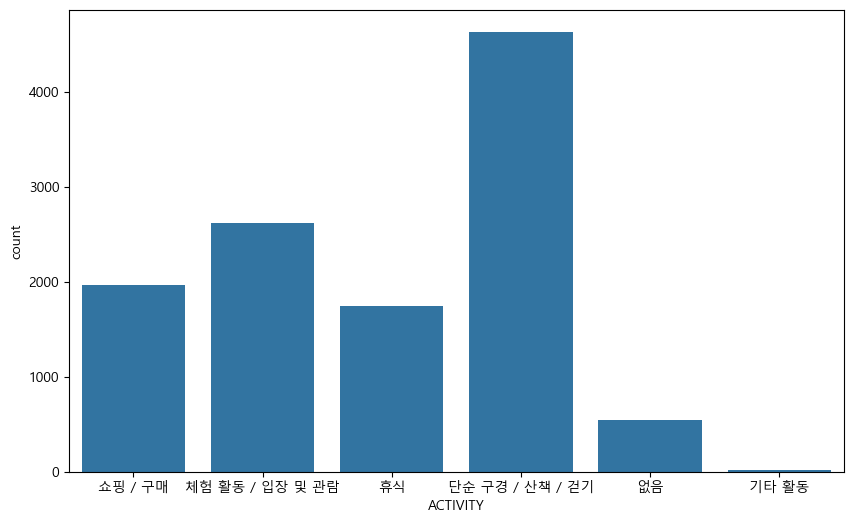

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', data=df_tm)
plt.show()

- 단순구경 -> 체험활동 -> 쇼핑 -> 휴식 순으로 빈도가 많음.

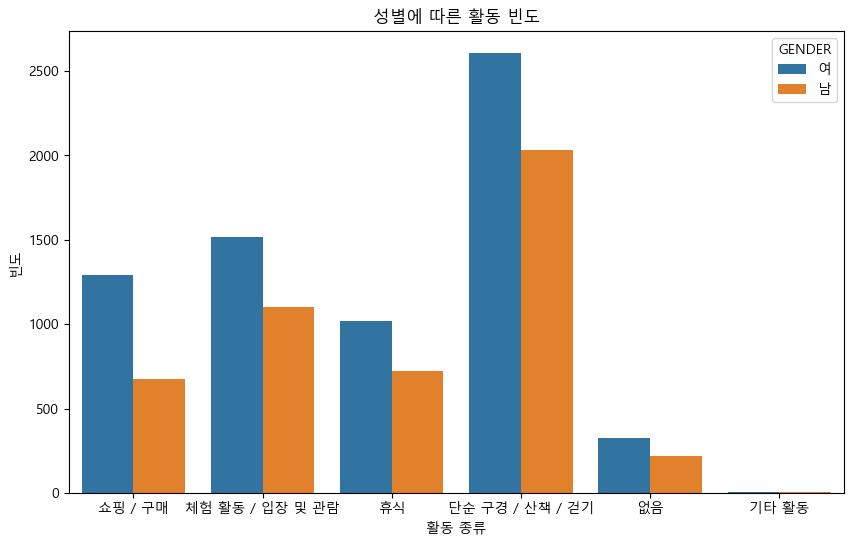

In [49]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['GENDER', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', hue='GENDER', data=df_tm)

plt.title("성별에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

- 남여 모두 구경/산책쪽으로 여행을 많이하는 반면에, 쇼핑/구매 목적으로 여행하는사람들은 남자보다 여자가 많음.

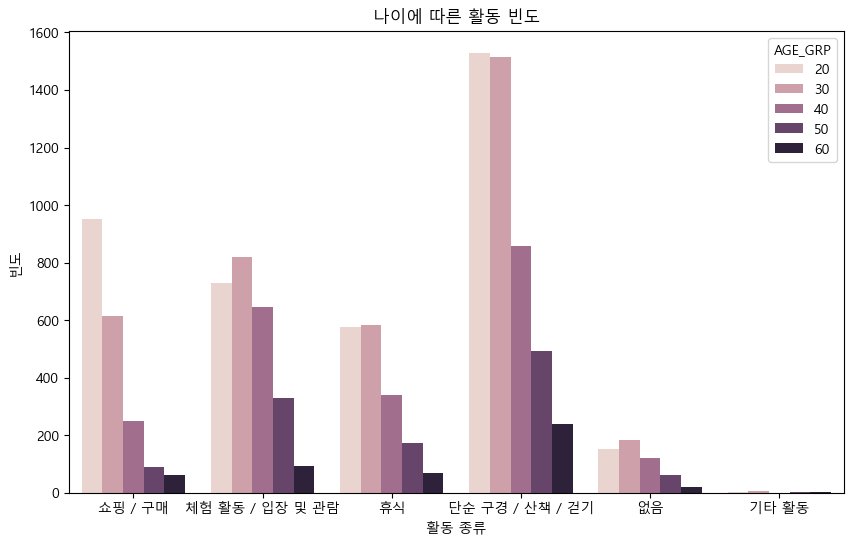

In [50]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['AGE_GRP', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', hue='AGE_GRP', data=df_tm)

plt.title("나이에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

- 전체적인 빈도수와 비슷한 경향성을 보이나, 쇼핑/구매 목적으로 여행하는 사람들의 나이대는 20대가 많음.

C:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\carra\AppData\Local\Programs\Python\Python310\

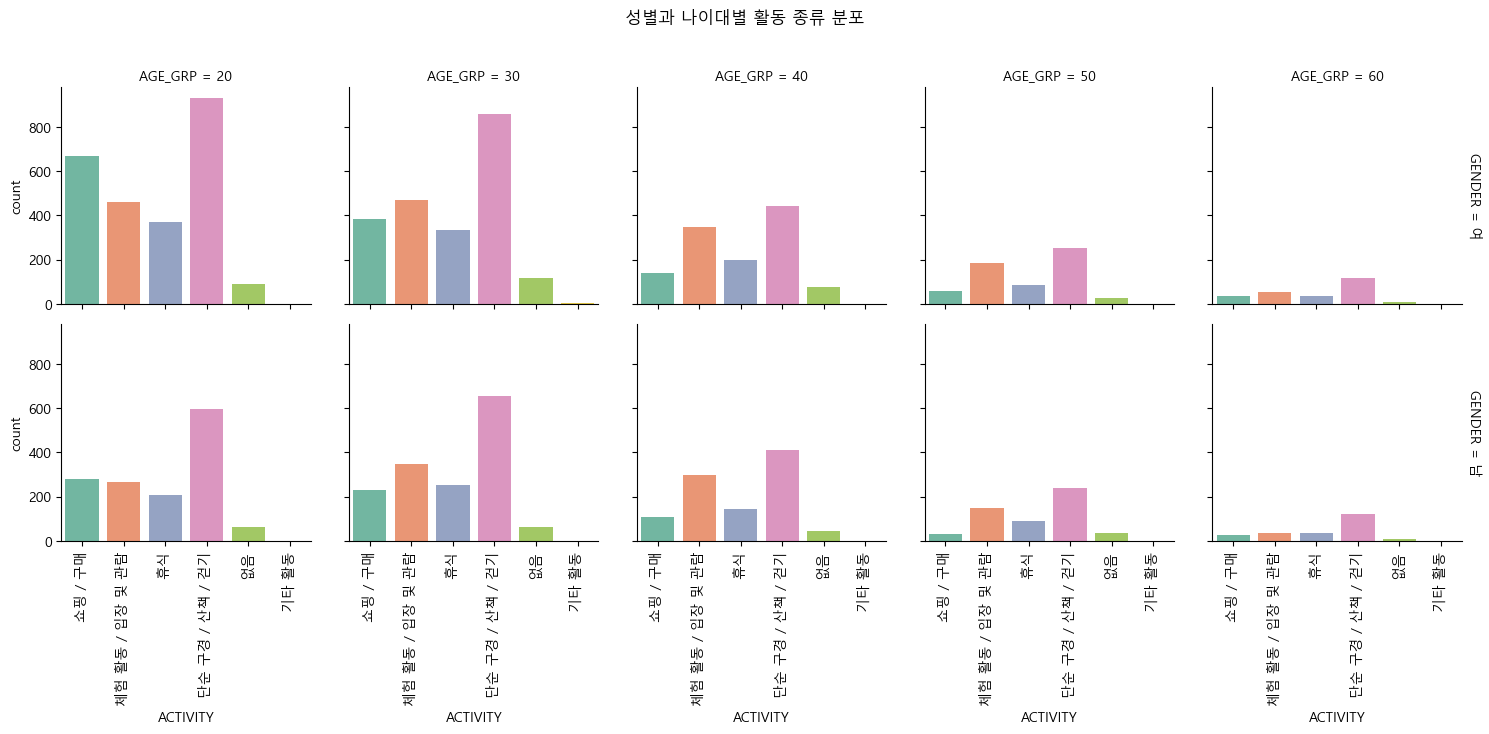

In [51]:
activity_counts = df_tm.groupby(['AGE_GRP', 'GENDER', 'ACTIVITY']).size().reset_index(name='count')

# 나이대와 성별을 나누어서 활동 종류를 시각화
g = sns.FacetGrid(df_tm, col="AGE_GRP", row="GENDER", margin_titles=True)
g.map(sns.countplot, 'ACTIVITY', order=df_tm['ACTIVITY'].unique(), palette='Set2')

# X축 레이블 회전
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)  # X축 레이블을 45도로 회전

# 제목과 레이아웃 조정
plt.subplots_adjust(top=0.85)
g.fig.suptitle("성별과 나이대별 활동 종류 분포")

# 결과 출력
plt.show()

- 여기서도 20대가 쇼핑/구매를 가장 많이 즐기지만, 그의 대부분은 여성임을 알 수 있음.
- 전체적으로 단순 구경/산책을 즐김
- 40대 부터는 쇼핑/구매 목적으로 여행가는 수가 줄어듬.
- 30대 남성의 경우 다른 나이대 보다 체험활동을 목적으로 여행가는 경우가 많음.

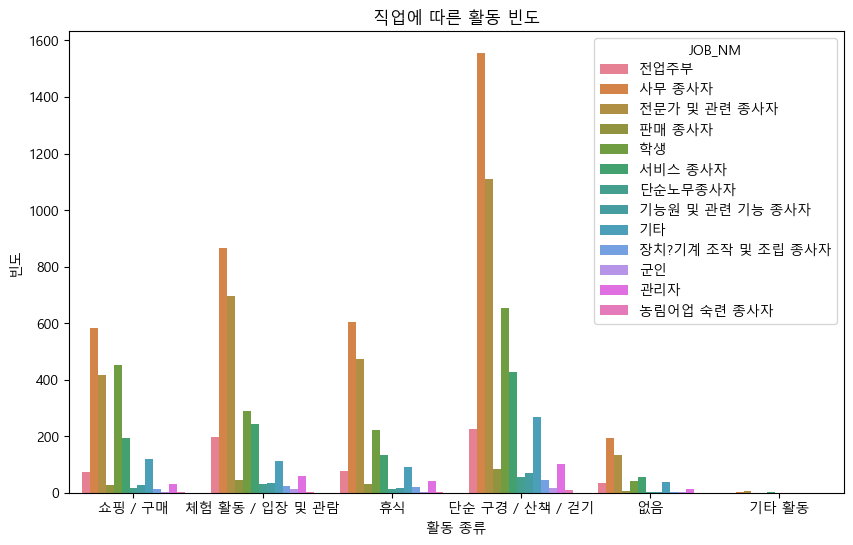

In [52]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['JOB_NM', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', hue='JOB_NM', data=df_tm)

plt.title("직업에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

- 직업에 대해서는 일반적인 경향성을 따라가기 때문에 특별한 점을 찾을 수 없었음.
- 하지만 쇼핑/구매 목적으로 여행가는 사람들은 학생인 경우가 많음.(경향성을 비교했을 때.)

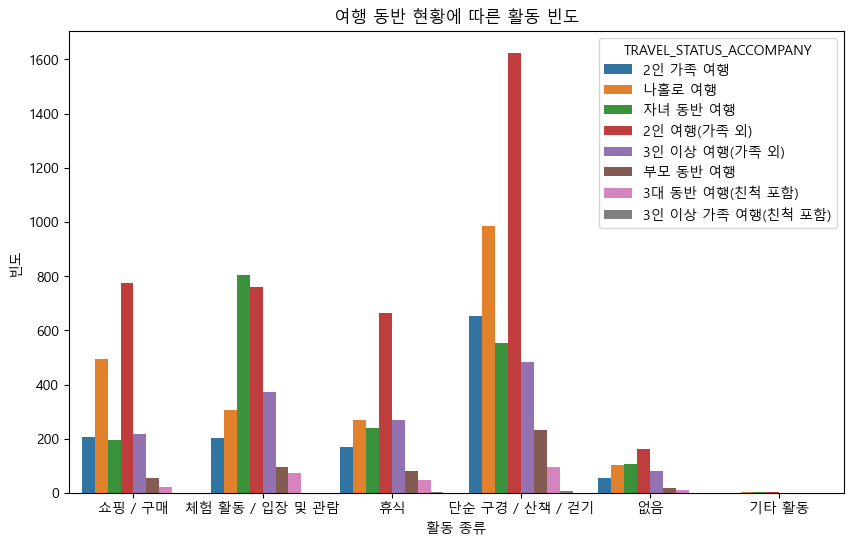

In [53]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['TRAVEL_STATUS_ACCOMPANY', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', hue='TRAVEL_STATUS_ACCOMPANY', data=df_tm)

plt.title("여행 동반 현황에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

- 커플 혹은 친구들과 하는 2인 여행이 가장 많음.
- 커플 혹은친구들과 하는 여행은 보통의 경향성을 따라가지만, 3인 이상으로 커플 혹은 친구들과 하는 여행은 체험 활동 목적으로 하는 경우도 많음.
- 자녀동반 여행인 경우 체험활동 목적으로 여행하는 경우가 많았음.
- 홀로 여행하는 경우, 체험활동, 휴식보다는 단순 구경이나 쇼핑 목적으로 여행하는 경우가 많음.

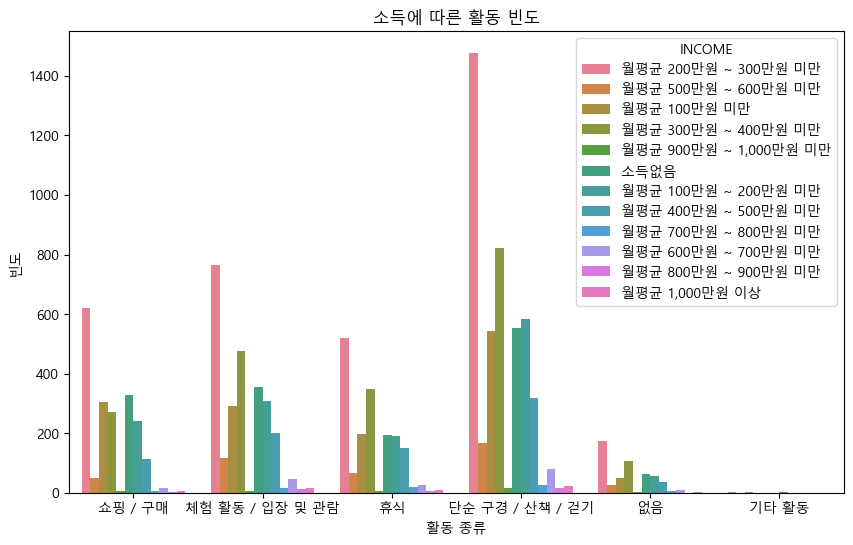

In [54]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['INCOME', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', hue='INCOME', data=df_tm)

plt.title("소득에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

- 개인소득에 대해서는 별다른 특이점을 찾을 수 없었음.

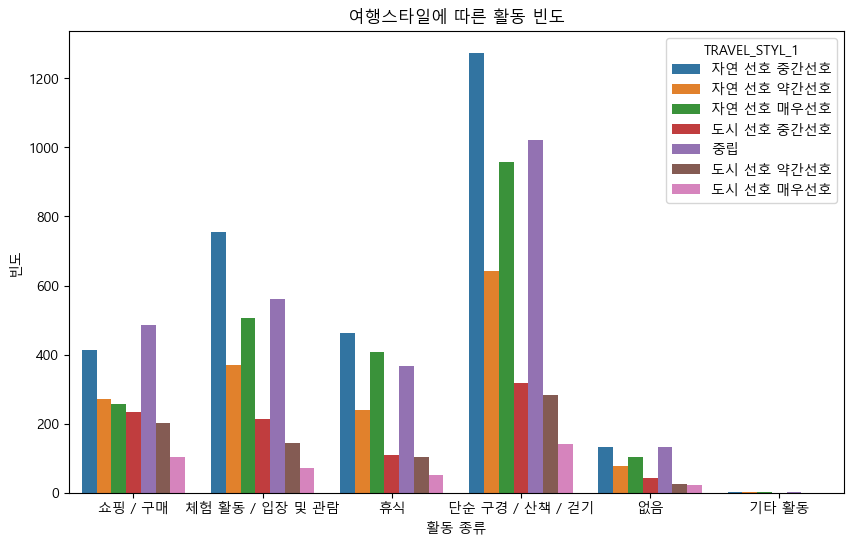

In [55]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['TRAVEL_STYL_1', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='ACTIVITY', hue='TRAVEL_STYL_1', data=df_tm)

plt.title("여행스타일에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

- 자연보다 도시를 선호할 때, 쇼핑/구매 활동을 즐겨하는 사람이 많았다.

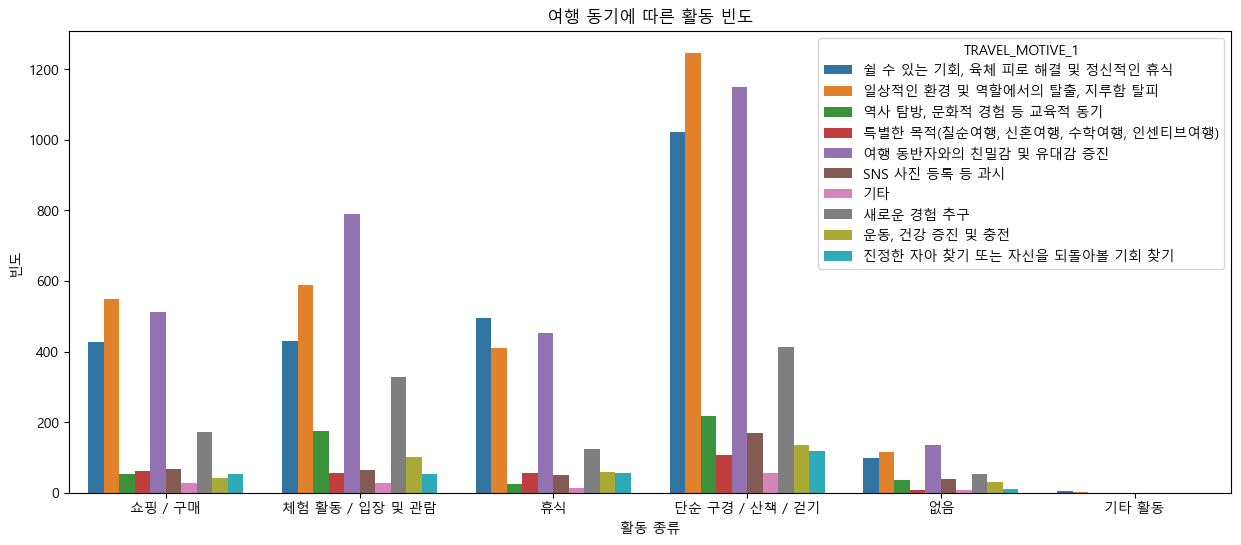

In [56]:
# 성별과 활동 종류별 빈도수 계산
activity_counts = df_tm.groupby(['TRAVEL_MOTIVE_1', 'ACTIVITY']).size().reset_index(name='count')

# 성별과 활동 종류별로 빈도수 시각화
plt.figure(figsize=(15,6))
sns.countplot(x='ACTIVITY', hue='TRAVEL_MOTIVE_1', data=df_tm)

plt.title("여행 동기에 따른 활동 빈도")
plt.xlabel("활동 종류")
plt.ylabel("빈도")
plt.show()

##

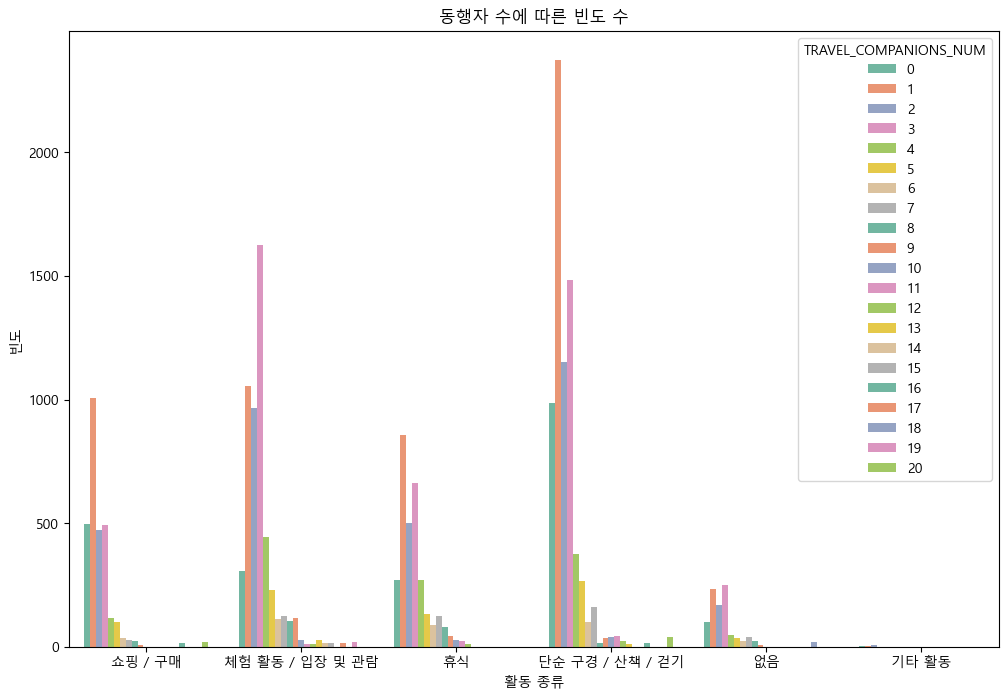

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ACTIVITY', hue='TRAVEL_COMPANIONS_NUM', data=df_com, palette='Set2')
plt.xlabel('활동 종류')
plt.ylabel('빈도')
plt.title('동행자 수에 따른 빈도 수')
plt.show()

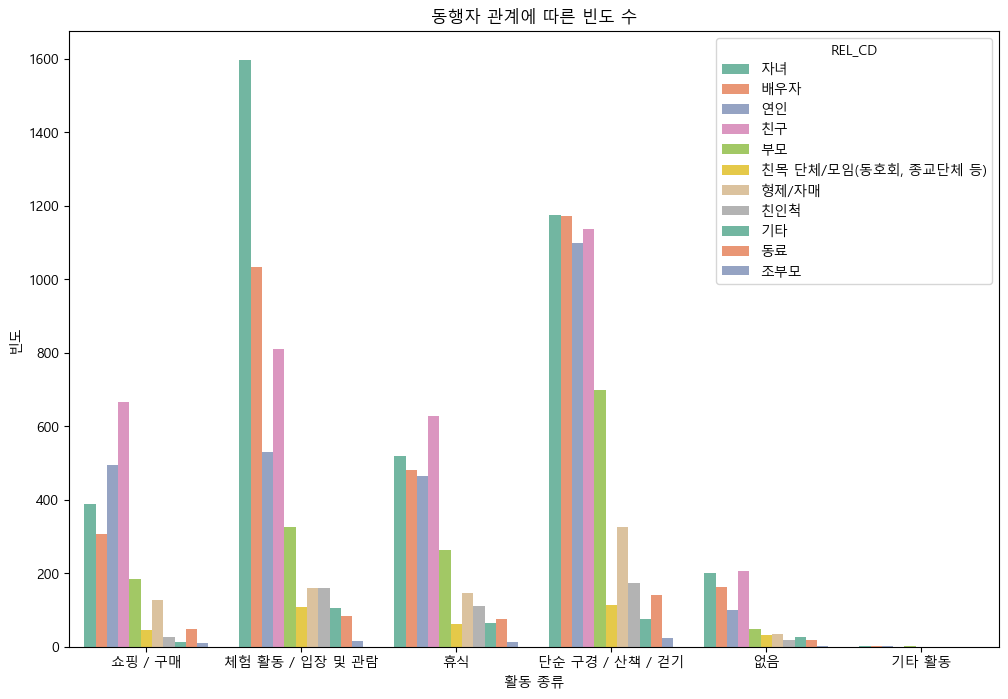

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ACTIVITY', hue='REL_CD', data=df_com, palette='Set2')
plt.xlabel('활동 종류')
plt.ylabel('빈도')
plt.title('동행자 관계에 따른 빈도 수')
plt.show()

- 자녀와 함께 가족단위로 여행 간 경우, 체험 활동 목적이 많음.
- 쇼핑/구매 목적의 여행은 친구 관계에서 많이 이루어짐.
- 배우자와의 여행 목적은 주로 단순 구경, 체험활동임.

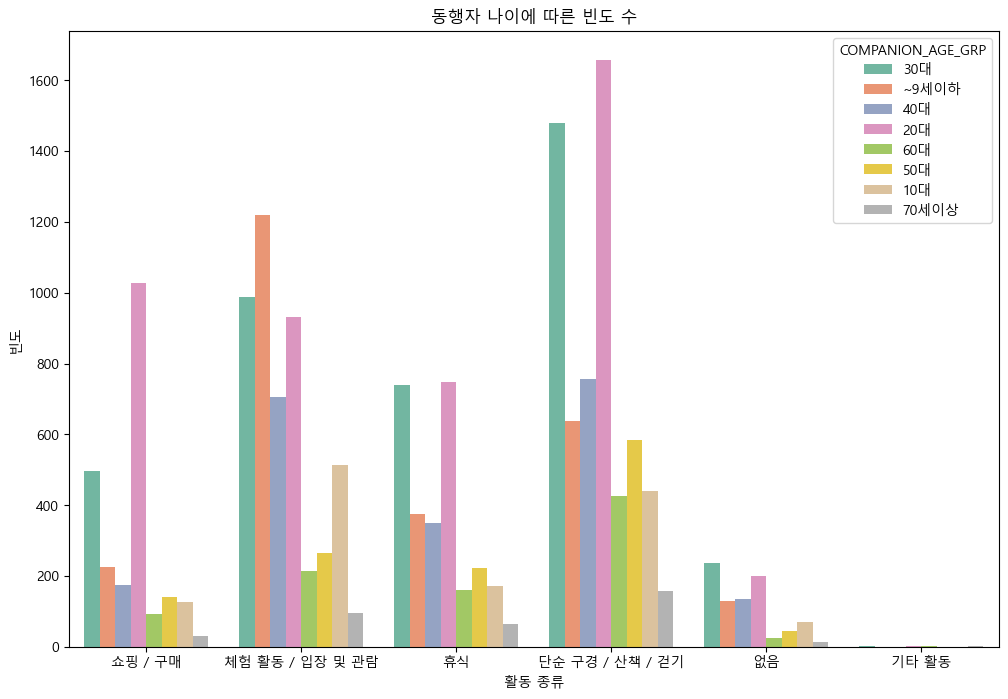

In [59]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ACTIVITY', hue='COMPANION_AGE_GRP', data=df_com, palette='Set2')
plt.xlabel('활동 종류')
plt.ylabel('빈도')
plt.title('동행자 나이에 따른 빈도 수')
plt.show()

- 이전에 위에서 20대에서 쇼핑/구매 목적으로 여행을 많이가는 사실을 확인했으며, 동행자와의 관계는 친구임.
- 체험 활동 목적의 여행은 자녀 동반이므로 9세이하의 자녀와 함께 여행감.
- 배우자와의 여행 목적은 체험 활동및 단순 구경이었으며, 배우자의 나이는 40대임.

C:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\carra\AppData\Local\Programs\Python\Python310\

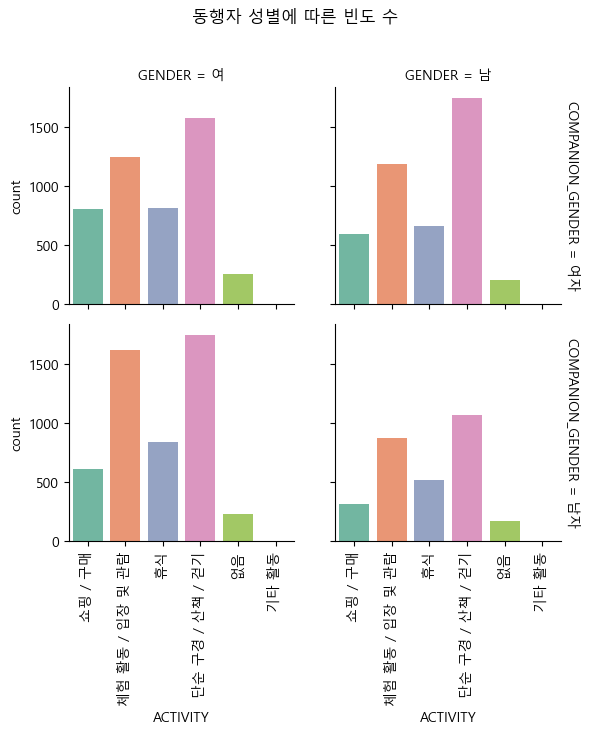

In [60]:
activity_counts = df_com.groupby(['GENDER', 'COMPANION_GENDER', 'ACTIVITY']).size().reset_index(name='count')

# 나이대와 성별을 나누어서 활동 종류를 시각화
g = sns.FacetGrid(df_com, col="GENDER", row="COMPANION_GENDER", margin_titles=True)
g.map(sns.countplot, 'ACTIVITY', order=df_com['ACTIVITY'].unique(), palette='Set2')

# X축 레이블 회전
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)  # X축 레이블을 45도로 회전

# 제목과 레이아웃 조정
plt.subplots_adjust(top=0.85)
g.fig.suptitle("동행자 성별에 따른 빈도 수")

# 결과 출력
plt.show()

In [62]:
df_com.head()

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,ACTIVITY_TYPE_CD,ACTIVITY,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION,SLEEP
0,e004720,41,여,60,고등학교,NaN,사별,3,전업주부,NaN,...,1,e_e004720,"[2, 5, 4, 4, 3]","[1, 2, 2, 2, 4, 5]",쇼핑 / 구매,자녀,여자,30대,계속 함께 여행,0
1,e000914,30,여,20,대학교(4년제 이상),NaN,미혼,1,사무 종사자,NaN,...,0,e_e000914,"[2, 4]","[1, 1, 1, 2, 3, 4]",쇼핑 / 구매,NaN,NaN,NaN,NaN,0
2,e003564,41,여,30,대학원 석사 과정,NaN,기혼,4,전문가 및 관련 종사자,NaN,...,3,e_e003564,"[3, 5, 4, 3, 4]","[1, 1, 2, 3]",체험 활동 / 입장 및 관람,자녀,남자,~9세이하,계속 함께 여행,0
3,e003564,41,여,30,대학원 석사 과정,NaN,기혼,4,전문가 및 관련 종사자,NaN,...,3,e_e003564,"[3, 5, 4, 3, 4]","[1, 1, 2, 3]",체험 활동 / 입장 및 관람,배우자,남자,40대,계속 함께 여행,0
4,e003564,41,여,30,대학원 석사 과정,NaN,기혼,4,전문가 및 관련 종사자,NaN,...,3,e_e003564,"[3, 5, 4, 3, 4]","[1, 1, 2, 3]",체험 활동 / 입장 및 관람,자녀,남자,~9세이하,계속 함께 여행,0


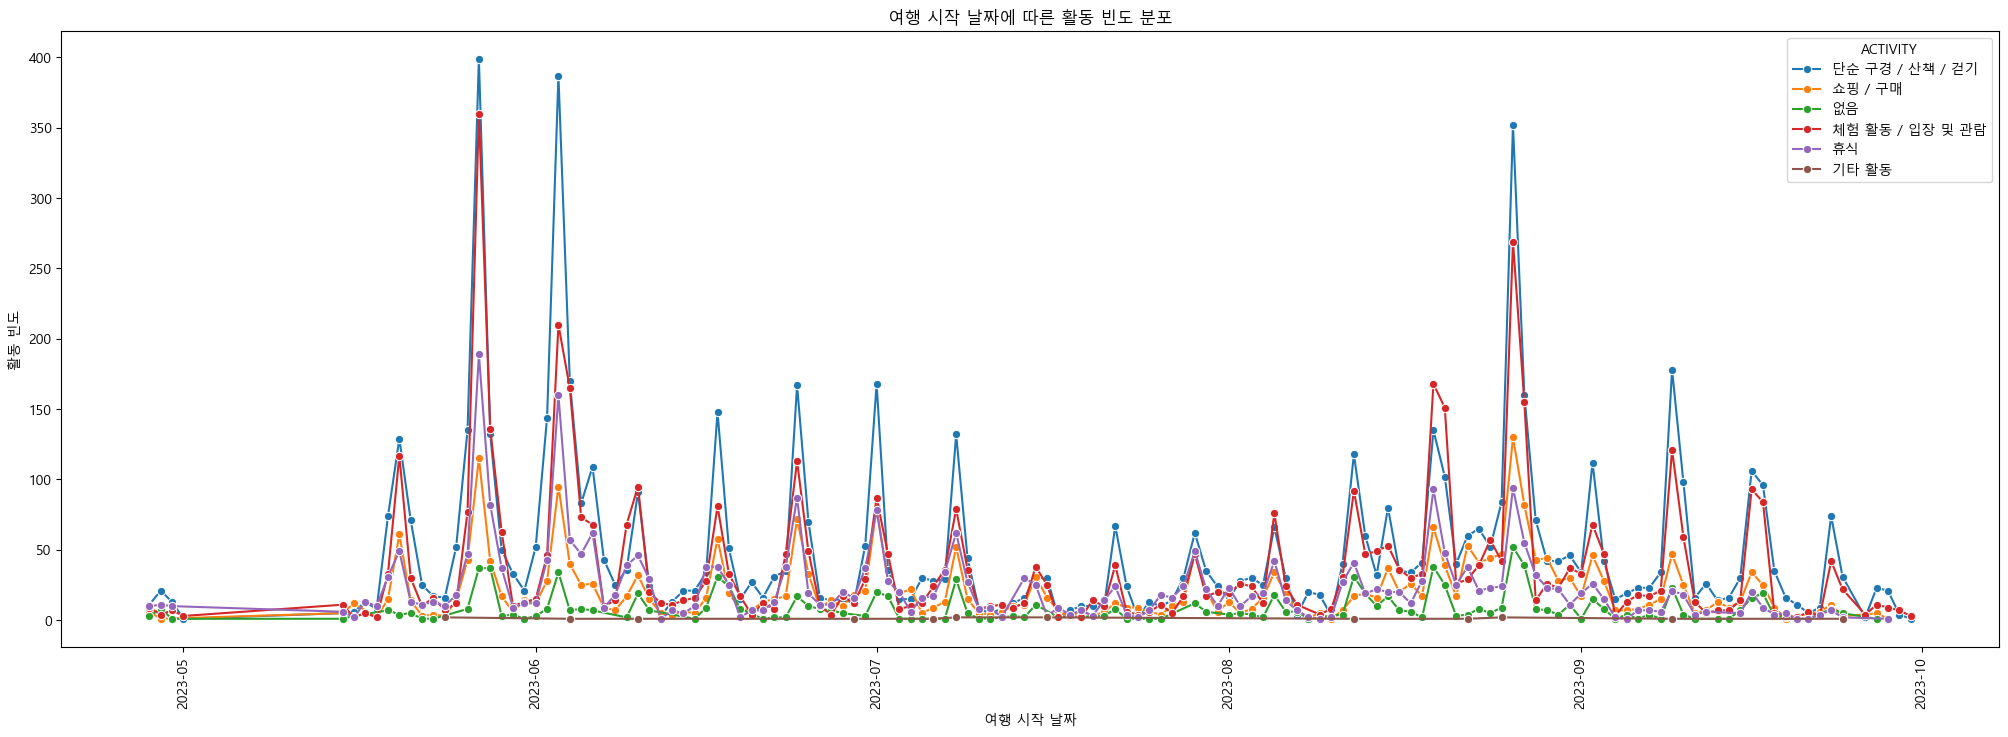

In [83]:
# 날짜별 활동 빈도 계산
activity_by_date = df_com.groupby(['min_start_date', 'ACTIVITY']).size().reset_index(name='count')

# 날짜별로 어떤 활동이 주로 이루어졌는지 시각화
plt.figure(figsize=(25, 8))
sns.lineplot(data=activity_by_date, x='min_start_date', y='count', hue='ACTIVITY', marker="o")

# X, Y축 라벨 및 제목 설정
plt.xlabel('여행 시작 날짜')
plt.ylabel('활동 빈도')
plt.title('여행 시작 날짜에 따른 활동 빈도 분포')
plt.xticks(rotation=90)  # x축 라벨 회전

# 그래프 출력
plt.show()

In [ ]:
# df_visarea['VISIT_START_YMD'] = pd.to_datetime(df_visarea['VISIT_START_YMD'])
# df_visarea['month'] = df_visarea['VISIT_START_YMD'].dt.to_period('M')

# df_time = df_visarea[['TRAVEL_ID', 'VISIT_START_YMD', 'month']]

# df_g = df_time.groupby(['TRAVEL_ID', 'VISIT_START_YMD', 'month'])['TRAVEL_ID'].count().reset_index(name='count')
# df_g = pd.merge(df_g, df_tm[['TRAVEL_ID', 'ACTIVITY']], on='TRAVEL_ID', how='left')
# # # 날짜별로 ACTIVITY의 빈도 계산
# # df_activity_count = df_g.groupby(['VISIT_START_YMD', 'ACTIVITY']).size().reset_index(name='count')

# # # 시계열 데이터 시각화
# # plt.figure(figsize=(10, 6))
# # sns.lineplot(data=df_activity_count, x='VISIT_START_YMD', y='count', hue='ACTIVITY')

# # # 그래프 제목 및 레이블 설정
# # plt.title('ACTIVITY Frequency Over Time')
# # plt.xlabel('Date')
# # plt.ylabel('Activity Count')
# # plt.xticks(rotation=45)
# # plt.tight_layout()

# # # 그래프 출력

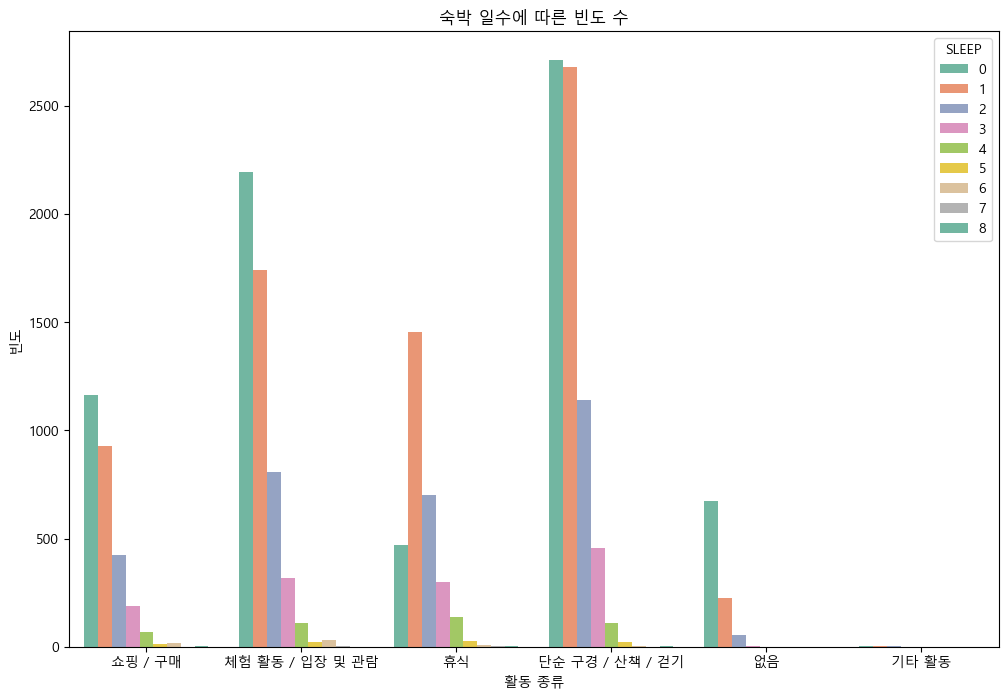

In [84]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ACTIVITY', hue='SLEEP', data=df_com, palette='Set2')
plt.xlabel('활동 종류')
plt.ylabel('빈도')
plt.title('숙박 일수에 따른 빈도 수')
plt.show()

## 여행자 클러스터링
- 여행자 나이
- 여행자 성별
- 여행자 소득
- 동행자 수 혹은 관계
- 숙박 일수
- 여행 스타일

In [ ]:
from sklearn.model_selection import train_test_split

df_ct = df_com[['TRAVEL_ID','AGE_GRP','INCOME','TRAVEL_STYL_1','REL_CD','TRAVEL_COMPANIONS_NUM','SLEEP','ACTIVITY']]
df_ct.dropna(inplace=True)
train_data, test_data = train_test_split(df_cp1, test_size=0.2, random_state=SEED)


In [ ]:
def encoding

In [ ]:
df_com.columns

In [ ]:
df_ct = df_com[['TRAVEL_ID','AGE_GRP','INCOME','TRAVEL_STYL_1','REL_CD','TRAVEL_COMPANIONS_NUM','SLEEP','ACTIVITY']]

In [ ]:
df_ct.dropna(inplace=True)

In [ ]:
df_ct.head()

In [ ]:
df_cp1 = df_ct.copy()
df_cp2 = df_ct.copy()

In [ ]:
df_cp1.head()

### 데이터 전처리

In [ ]:
# 범주형 컬럼만 선택
categorical_columns = ['INCOME', 'TRAVEL_STYL_1','REL_CD', 'ACTIVITY']

# 범주형 데이터를 원-핫 인코딩
df_cp1 = pd.get_dummies(df_cp1, columns=categorical_columns, drop_first=True)

# 원핫 인코딩 후 생성된 bool 컬럼들을 int로 변환
df_cp1 = df_cp1.astype({col: 'int' for col in df_cp1.columns if df_cp1[col].dtype == 'bool'})

# 결과 확인
df_cp1.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['AGE_GRP', 'TRAVEL_COMPANIONS_NUM', 'SLEEP']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 수치형 데이터 표준화
df_cp1[numeric_columns] = scaler.fit_transform(df_cp1[numeric_columns])

In [ ]:
df_cp1.head()

### 클러스터링 수행

In [ ]:
import random
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# fix seed
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

SEED = 42
seed_everything(SEED)

In [ ]:
# # 최적의 클러스터 수를 찾기 위한 리스트 초기화
# sse = []  # 엘보우용 리스트
# silhouette_scores = []  # 실루엣용 리스트
# k_values = range(2, 11)  # 테스트할 클러스터 개수 범위

# # 수치형 컬럼만 선택
# df_numeric = df_cp1.select_dtypes(include=[np.number])

# # 각 K에 대해 엘보우와 실루엣 점수 계산
# for k in k_values:
#     # KMeans 설정
#     kmeans = KMeans(n_clusters=k, random_state=SEED)
#     clusters = kmeans.fit_predict(df_numeric)
    
#     # SSE (Inertia) 계산
#     sse.append(kmeans.inertia_)
    
#     # 실루엣 점수 계산
#     silhouette_avg = silhouette_score(df_numeric, clusters)  # 유클리드 거리 사용
#     silhouette_scores.append(silhouette_avg)

# # 엘보우 방법 시각화
# plt.figure(figsize=(10, 5))
# plt.plot(k_values, sse, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('SSE (Inertia)')
# plt.title('Elbow Method for Optimal K')
# plt.show()

# # 실루엣 계수 시각화
# plt.figure(figsize=(10, 5))
# plt.plot(k_values, silhouette_scores, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method for Optimal K')
# plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# TRAVEL_ID 컬럼 제외
df_cp1 = df_cp1.drop(columns=['TRAVEL_ID'])

# 데이터를 80% 학습용, 20% 예측용으로 분리
train_data, test_data = train_test_split(df_cp1, test_size=0.2, random_state=SEED)


In [ ]:
# 최적의 클러스터 수를 선택 
optimal_k = 4

# KMeans 모델을 최적의 클러스터 수로 학습
kmeans = KMeans(n_clusters=optimal_k, random_state=SEED)
kmeans.fit(train_data)

# 클러스터 레이블을 데이터프레임에 추가
df_ct['Cluster'] = kmeans.labels_

# 클러스터링 결과 출력
df_ct.head()

In [ ]:
df_ct['REL_CD'].value_counts()

In [ ]:
df_ct['Cluster'].value_counts()

In [ ]:
# df_ct.to_csv('cluster.csv', index=False, encoding='utf-8-sig')

### 클러스터 별 활동 분석

In [52]:
df_tc_age = df_com.groupby(['AGE_GRP','REL_CD','ACTIVITY']).size().reset_index(name='count')
df_tc_age.loc[df_tc_age['AGE_GRP'] == 40 ,:]

,AGE_GRP,REL_CD,ACTIVITY,count
110,40,기타,단순 구경 / 산책 / 걷기,12
111,40,기타,쇼핑 / 구매,2
112,40,기타,없음,6
113,40,기타,체험 활동 / 입장 및 관람,32
114,40,기타,휴식,11
115,40,동료,단순 구경 / 산책 / 걷기,15
116,40,동료,쇼핑 / 구매,17
117,40,동료,없음,14
118,40,동료,체험 활동 / 입장 및 관람,24
119,40,동료,휴식,13


In [53]:
# 'TRAVEL_STYL_1' 컬럼에서 '자연 선호'와 '도시 선호'를 기준으로 값을 변경
df_cp2 = df_ct.drop(columns='TRAVEL_ID')
df_cp2['TRAVEL_STYL_1'] = df_ct['TRAVEL_STYL_1'].apply(
    lambda x: '자연 선호' if '자연 선호' in x else ('도시 선호' if '도시 선호' in x else x)
)

In [54]:
df_clus = df_cp2.groupby(['Cluster','AGE_GRP','INCOME','TRAVEL_STYL_1','REL_CD','TRAVEL_COMPANIONS_NUM','SLEEP','ACTIVITY']).size().reset_index(name='counts')

In [55]:
df_clus0 = df_clus.loc[df_clus['Cluster'] == 0, :]
df_clus1 = df_clus.loc[df_clus['Cluster'] == 1, :]
df_clus2 = df_clus.loc[df_clus['Cluster'] == 2, :]
df_clus3 = df_clus.loc[df_clus['Cluster'] == 3, :]

In [56]:
df_clus0.head()

,Cluster,AGE_GRP,INCOME,TRAVEL_STYL_1,REL_CD,TRAVEL_COMPANIONS_NUM,SLEEP,ACTIVITY,counts
0,0,40,소득없음,도시 선호,기타,5,1,단순 구경 / 산책 / 걷기,2
1,0,40,소득없음,도시 선호,배우자,1,0,단순 구경 / 산책 / 걷기,2
2,0,40,소득없음,도시 선호,배우자,1,0,체험 활동 / 입장 및 관람,1
3,0,40,소득없음,도시 선호,배우자,2,0,단순 구경 / 산책 / 걷기,1
4,0,40,소득없음,도시 선호,배우자,2,1,체험 활동 / 입장 및 관람,1


In [57]:
df_clus0.describe(include='all')

,Cluster,AGE_GRP,INCOME,TRAVEL_STYL_1,REL_CD,TRAVEL_COMPANIONS_NUM,SLEEP,ACTIVITY,counts
count,2755.0,2755.000000,2755,2755,2755,2755.000000,2755.000000,2755,2755.000000
unique,NaN,NaN,12,3,11,NaN,NaN,6,NaN
top,NaN,NaN,월평균 200만원 ~ 300만원 미만,자연 선호,배우자,NaN,NaN,단순 구경 / 산책 / 걷기,NaN
freq,NaN,NaN,574,1660,941,NaN,NaN,1018,NaN
mean,0.0,47.419238,NaN,NaN,NaN,2.512160,0.626497,NaN,2.035572
std,0.0,7.413279,NaN,NaN,NaN,1.259725,0.663025,NaN,1.795511
min,0.0,40.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,1.000000
25%,0.0,40.000000,NaN,NaN,NaN,2.000000,0.000000,NaN,1.000000
50%,0.0,50.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000
75%,0.0,50.000000,NaN,NaN,NaN,3.000000,1.000000,NaN,2.000000


In [58]:
df_clus1.describe(include='all')

,Cluster,AGE_GRP,INCOME,TRAVEL_STYL_1,REL_CD,TRAVEL_COMPANIONS_NUM,SLEEP,ACTIVITY,counts
count,2598.0,2598.000000,2598,2598,2598,2598.000000,2598.000000,2598,2598.000000
unique,NaN,NaN,12,3,11,NaN,NaN,6,NaN
top,NaN,NaN,월평균 200만원 ~ 300만원 미만,자연 선호,친구,NaN,NaN,단순 구경 / 산책 / 걷기,NaN
freq,NaN,NaN,681,1250,613,NaN,NaN,806,NaN
mean,1.0,25.446497,NaN,NaN,NaN,2.025789,0.645881,NaN,2.675135
std,0.0,4.988707,NaN,NaN,NaN,1.142060,0.637734,NaN,3.134749
min,1.0,20.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,1.000000
25%,1.0,20.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,1.000000
50%,1.0,30.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,2.000000
75%,1.0,30.000000,NaN,NaN,NaN,3.000000,1.000000,NaN,3.000000


In [59]:
df_clus2.describe(include='all')

,Cluster,AGE_GRP,INCOME,TRAVEL_STYL_1,REL_CD,TRAVEL_COMPANIONS_NUM,SLEEP,ACTIVITY,counts
count,514.0,514.000000,514,514,514,514.000000,514.000000,514,514.000000
unique,NaN,NaN,11,3,11,NaN,NaN,5,NaN
top,NaN,NaN,월평균 200만원 ~ 300만원 미만,자연 선호,배우자,NaN,NaN,체험 활동 / 입장 및 관람,NaN
freq,NaN,NaN,114,330,92,NaN,NaN,172,NaN
mean,2.0,39.533074,NaN,NaN,NaN,8.309339,1.132296,NaN,2.922179
std,0.0,10.965828,NaN,NaN,NaN,2.456568,0.800833,NaN,2.856847
min,2.0,20.000000,NaN,NaN,NaN,6.000000,0.000000,NaN,1.000000
25%,2.0,30.000000,NaN,NaN,NaN,7.000000,1.000000,NaN,1.000000
50%,2.0,40.000000,NaN,NaN,NaN,8.000000,1.000000,NaN,2.000000
75%,2.0,50.000000,NaN,NaN,NaN,9.000000,2.000000,NaN,4.000000


In [60]:
df_clus3.describe(include='all')

,Cluster,AGE_GRP,INCOME,TRAVEL_STYL_1,REL_CD,TRAVEL_COMPANIONS_NUM,SLEEP,ACTIVITY,counts
count,1785.0,1785.000000,1785,1785,1785,1785.000000,1785.000000,1785,1785.000000
unique,NaN,NaN,12,3,11,NaN,NaN,6,NaN
top,NaN,NaN,월평균 200만원 ~ 300만원 미만,자연 선호,배우자,NaN,NaN,단순 구경 / 산책 / 걷기,NaN
freq,NaN,NaN,404,1051,452,NaN,NaN,543,NaN
mean,3.0,34.257703,NaN,NaN,NaN,2.444258,2.890756,NaN,1.695238
std,0.0,9.164707,NaN,NaN,NaN,1.372517,1.019897,NaN,1.201225
min,3.0,20.000000,NaN,NaN,NaN,1.000000,2.000000,NaN,1.000000
25%,3.0,30.000000,NaN,NaN,NaN,1.000000,2.000000,NaN,1.000000
50%,3.0,30.000000,NaN,NaN,NaN,2.000000,3.000000,NaN,1.000000
75%,3.0,40.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,2.000000


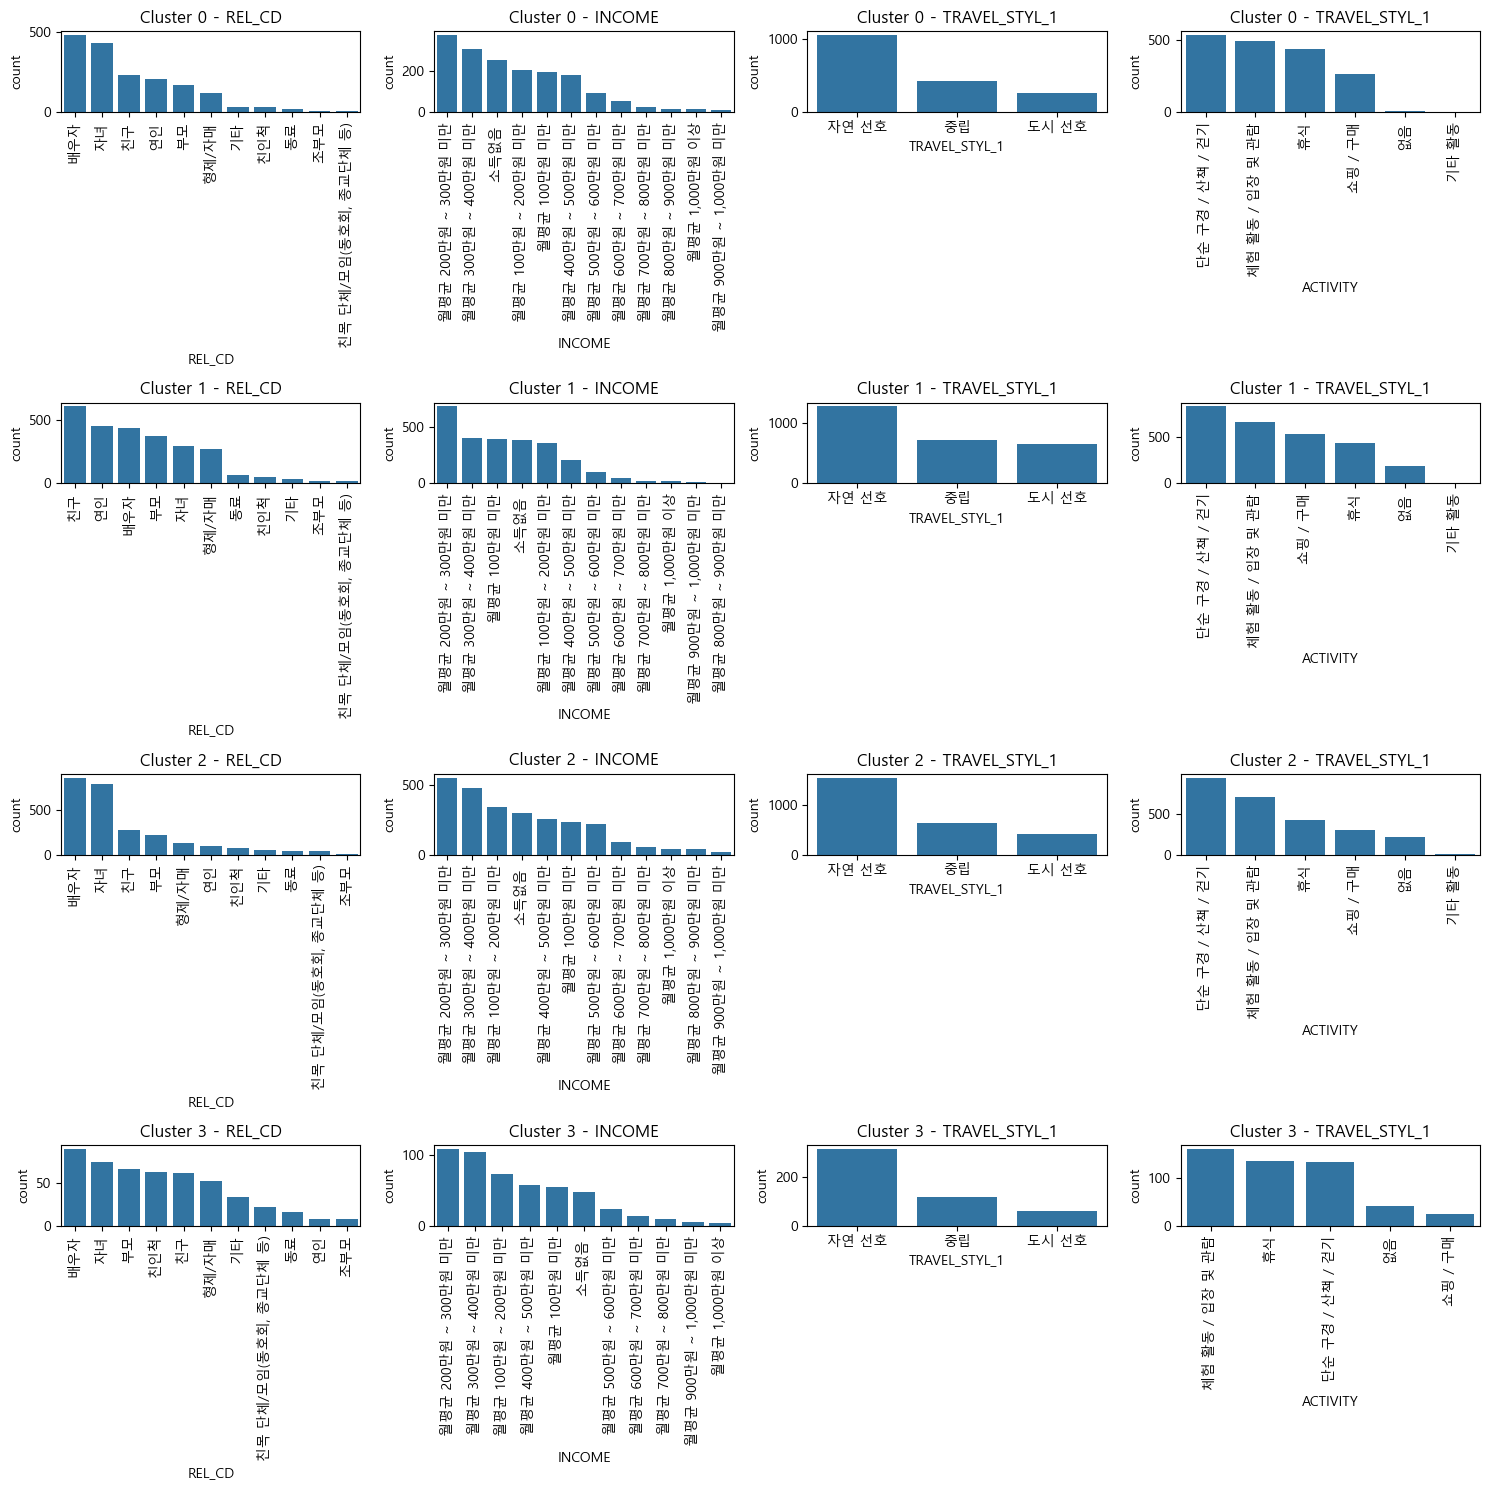

In [81]:
# 4행 3열 subplot 생성
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# 각 클러스터 집단에 대해 countplot 그리기
for i, df_clus in enumerate([df_clus0, df_clus1, df_clus2, df_clus3]):
    # REL_CD 컬럼에 대해 countplot (내림차순 정렬)
    rel_cd_order = df_clus['REL_CD'].value_counts().index
    sns.countplot(x='REL_CD', data=df_clus, ax=axes[i, 0], order=rel_cd_order)
    axes[i, 0].set_title(f'Cluster {i} - REL_CD')
    axes[i, 0].tick_params(axis='x', rotation=90)

    # INCOME 컬럼에 대해 countplot (내림차순 정렬)
    income_order = df_clus['INCOME'].value_counts().index
    sns.countplot(x='INCOME', data=df_clus, ax=axes[i, 1], order=income_order)
    axes[i, 1].set_title(f'Cluster {i} - INCOME')
    axes[i, 1].tick_params(axis='x', rotation=90)

    # TRAVEL_STYL_1 컬럼에 대해 countplot (내림차순 정렬)
    travel_styl_1_order = df_clus['TRAVEL_STYL_1'].value_counts().index
    sns.countplot(x='TRAVEL_STYL_1', data=df_clus, ax=axes[i, 2], order=travel_styl_1_order)
    axes[i, 2].set_title(f'Cluster {i} - TRAVEL_STYL_1')

     # TRAVEL_STYL_1 컬럼에 대해 countplot (내림차순 정렬)
    travel_styl_1_order = df_clus['ACTIVITY'].value_counts().index
    sns.countplot(x='ACTIVITY', data=df_clus, ax=axes[i, 3], order=travel_styl_1_order)
    axes[i, 3].set_title(f'Cluster {i} - TRAVEL_STYL_1')
    axes[i, 3].tick_params(axis='x', rotation=90)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()